In [32]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = "./transactions-ser"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=';')
    df['file'] = f.split('/')[-1]
    all_df.append(df)

data = pd.concat(all_df, ignore_index=True)
merged_df = data.copy()
display(merged_df)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,file
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,...,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,...,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,...,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB,transactions-ser\76575_000AB.csv
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,...,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW,transactions-ser\76575_000BW.csv
2968,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2969,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2970,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW,transactions-ser\76575_000BW.csv


In [75]:
# Récupèrer que les lignes qui contient appartement et maison
df = merged_df[merged_df.type_local == 'Maison']

In [34]:
to_drop = [column for column in df.columns if df[column].nunique() == 1]

df1 = df.drop(columns=to_drop)
#df1.drop(['file', 'type_local', 'code_postal', 'nature_culture_speciale','adresse_nom_voie','id_mutation','date_mutation'], axis=1, inplace=True)


In [76]:
df1=df1.replace(to_replace='None', value=np.nan)

In [77]:
missing_rate = df1.isna().sum()/df1.shape[0]
missing_rate

numero_disposition           0.0
nature_mutation              0.0
valeur_fonciere              0.0
adresse_numero               0.0
nombre_lots                  0.0
surface_reelle_bati          0.0
nombre_pieces_principales    0.0
code_nature_culture          0.0
surface_terrain              0.0
longitude                    0.0
latitude                     0.0
section_prefixe              0.0
annee_mutation               0.0
dtype: float64

In [78]:
#Supprimer les colonnes ayant un messing_rate > 0.8
df1.drop(columns=['adresse_suffixe','lot1_numero', 'lot1_surface_carrez','code_nature_culture_speciale','nature_culture_speciale'], inplace=True)
#Supprimer les colonnes ayant d'autres colonnes les représentant avec des valeur (int, ....)
df1.drop(columns = ['adresse_nom_voie','nature_culture','file','id_mutation','code_postal','id_parcelle','adresse_code_voie'], inplace=True)
df1 = df1.dropna() #We can drop all the rows that have NaN, we don't lose a lot of data

KeyError: "['adresse_suffixe', 'lot1_numero', 'lot1_surface_carrez', 'code_nature_culture_speciale', 'nature_culture_speciale'] not found in axis"

,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,nombre_lots,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude,section_prefixe,annee_mutation
2,1,0,160000.0,13.0,0,64.0,4.0,0,452.0,1.070963,49.402764,0,2021
3,1,0,174000.0,21.0,0,64.0,4.0,0,498.0,1.070475,49.403622,0,2021
7,1,0,180000.0,28.0,0,108.0,5.0,0,348.0,1.071647,49.401956,0,2019
8,1,0,188000.0,38.0,0,74.0,5.0,0,377.0,1.070502,49.402256,0,2019
10,1,0,147000.0,26.0,0,64.0,4.0,0,499.0,1.071141,49.402320,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,1,0,158500.0,1.0,0,97.0,5.0,0,406.0,1.074306,49.400785,29,2017
2948,1,0,145000.0,27.0,0,74.0,5.0,0,374.0,1.072432,49.400659,29,2017
2949,1,0,262500.0,5.0,0,102.0,5.0,0,434.0,1.069653,49.399310,29,2017
2950,1,0,130000.0,25.0,0,64.0,4.0,0,369.0,1.072534,49.400600,29,2017


array([[<AxesSubplot:title={'center':'numero_disposition'}>,
        <AxesSubplot:title={'center':'nature_mutation'}>,
        <AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'adresse_numero'}>],
       [<AxesSubplot:title={'center':'nombre_lots'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>,
        <AxesSubplot:title={'center':'nombre_pieces_principales'}>,
        <AxesSubplot:title={'center':'code_nature_culture'}>],
       [<AxesSubplot:title={'center':'surface_terrain'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'section_prefixe'}>],
       [<AxesSubplot:title={'center':'annee_mutation'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

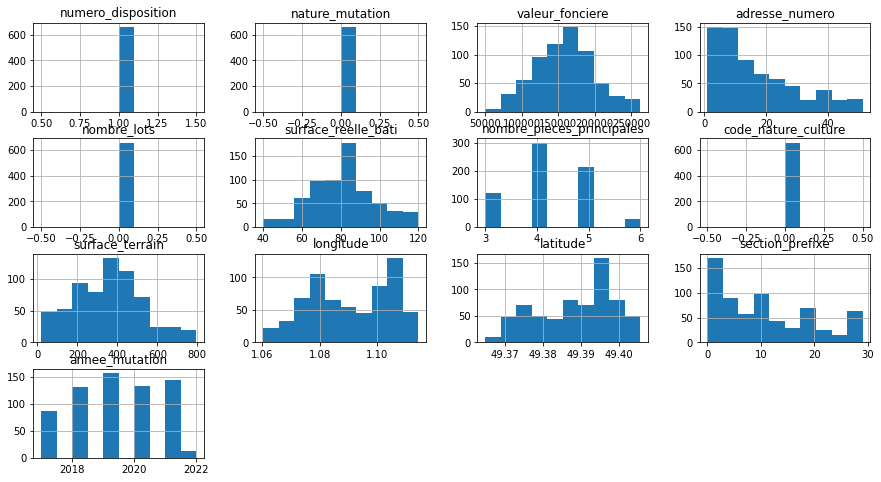

In [79]:
display(df1)
df1.hist(figsize=(15,8))

<AxesSubplot:>

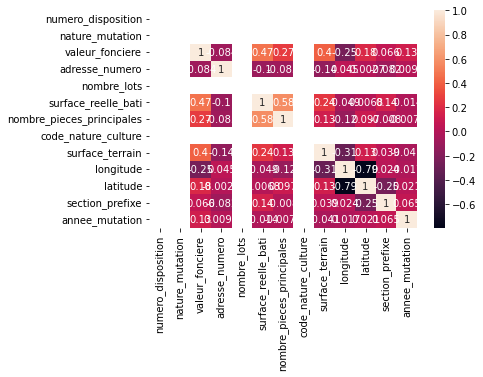

In [80]:
sns.heatmap(df1.corr(), annot=True)

In [40]:
df1['annee_mutation'] = df1['date_mutation'].apply(lambda x: x.split('-')[0])
df1['annee_mutation']= df1['annee_mutation'].astype(int)
df1 = df1.drop(['date_mutation'], axis=1)
df1 = df1.drop(['code_type_local'], axis=1)

In [41]:
code = {'Vente': 0,
        'Adjudication': 1,
        'Vente en l\'état futur d\'achèvement': 2,
        'S':0,
        'AG':1,
        'J':2,
        'L':3,
        'AB':4,
        '1':1,
        '2':2,
        '000AB': 0, '000AC': 1, '000AD': 2, '000AE': 3, '000AH': 4, '000AI': 5, '000AK': 6, '000AO': 7, '000AP': 8,
        '000AR': 9, '000AS': 10, '000AT': 11, '000AV': 12, '000AW': 13, '000AX': 14, '000AY': 15, '000AZ': 16, '000BC': 17,
        '000BD': 18, '000BE': 19, '000BH': 20, '000BK': 21, '000BL': 22, '000BM': 23, '000BO': 24, '000BP': 25, '000BR': 26,
        '000BS': 27, '000BT': 28, '000BV': 29, '000BW': 30
       }

for col in df1.select_dtypes('object'):
    df1[col] = df1[col].map(code)

array([[<AxesSubplot:title={'center':'numero_disposition'}>,
        <AxesSubplot:title={'center':'nature_mutation'}>,
        <AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'adresse_numero'}>],
       [<AxesSubplot:title={'center':'nombre_lots'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>,
        <AxesSubplot:title={'center':'nombre_pieces_principales'}>,
        <AxesSubplot:title={'center':'code_nature_culture'}>],
       [<AxesSubplot:title={'center':'surface_terrain'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'section_prefixe'}>],
       [<AxesSubplot:title={'center':'annee_mutation'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

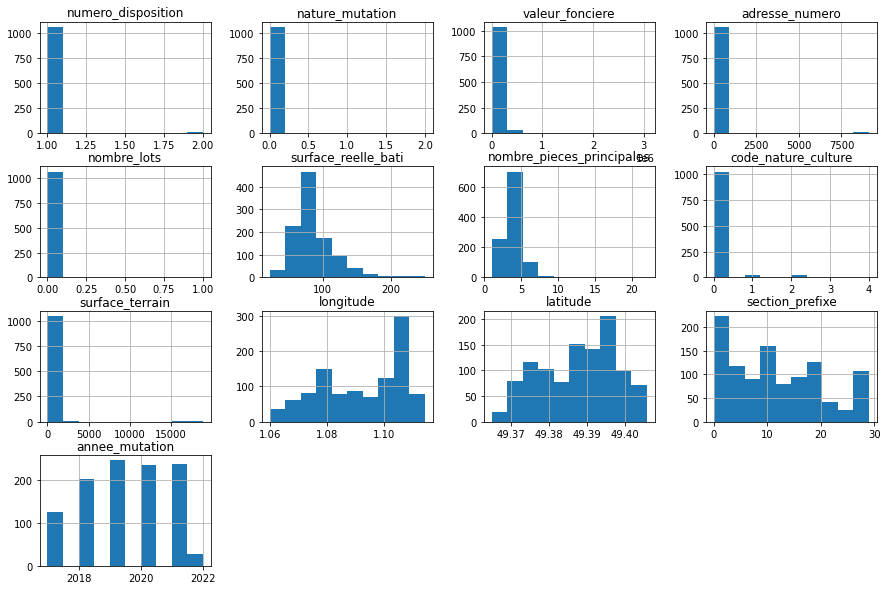

In [42]:
#print(df1['section_prefixe'].unique())
df1.hist(figsize=(15,10))

In [43]:
mask = df1.isnull().any(1)
df1 = df1[~mask]
display(df1)


,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,nombre_lots,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude,section_prefixe,annee_mutation
0,1,0,260000.0,26.0,0,129.0,4.0,0,351.0,1.071855,49.401886,0,2022
2,1,0,160000.0,13.0,0,64.0,4.0,0,452.0,1.070963,49.402764,0,2021
3,1,0,174000.0,21.0,0,64.0,4.0,0,498.0,1.070475,49.403622,0,2021
7,1,0,180000.0,28.0,0,108.0,5.0,0,348.0,1.071647,49.401956,0,2019
8,1,0,188000.0,38.0,0,74.0,5.0,0,377.0,1.070502,49.402256,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,0,225000.0,1.0,0,188.0,6.0,0,389.0,1.069955,49.399447,29,2017
2948,1,0,145000.0,27.0,0,74.0,5.0,0,374.0,1.072432,49.400659,29,2017
2949,1,0,262500.0,5.0,0,102.0,5.0,0,434.0,1.069653,49.399310,29,2017
2950,1,0,130000.0,25.0,0,64.0,4.0,0,369.0,1.072534,49.400600,29,2017


<AxesSubplot:>

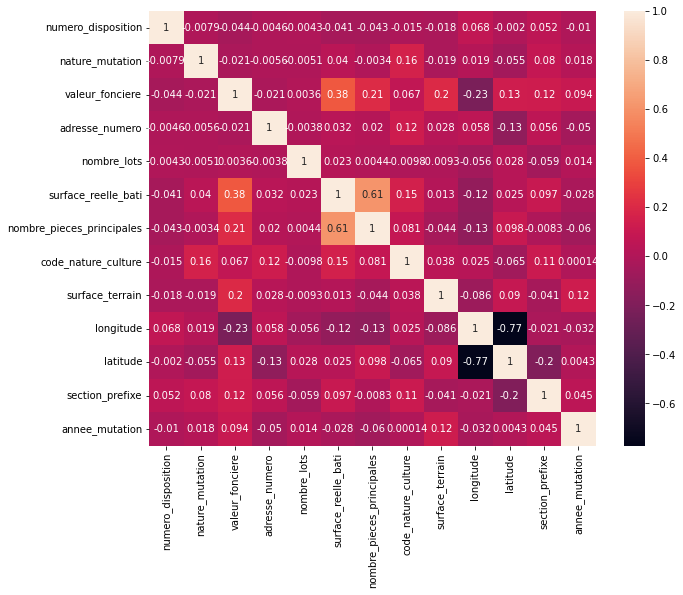

In [45]:
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, ax=ax)


In [46]:
def remove_outliers(df):
    """
    Remove outliers from a dataframe for all columns.
    
    Parameters:
    df: Pandas dataframe
    
    Returns:
    df: Dataframe with outliers removed
    """
    for col in df.columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Index dataframe to select rows with non-outlying values
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    
    return df


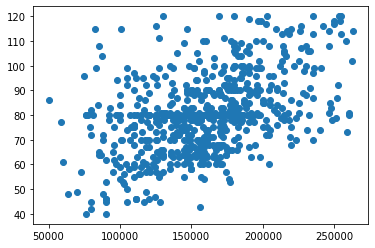

In [74]:
df1 = remove_outliers(df1)
df1

plt.scatter(df1['valeur_fonciere'], df1['surface_reelle_bati'])

C:\Users\Yacine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valeur_fonciere'>

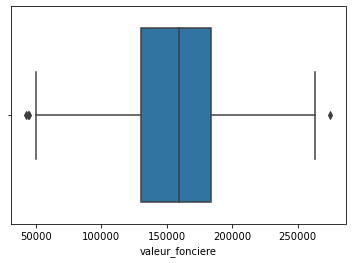

In [55]:
sns.boxplot(df1['valeur_fonciere'])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline  import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
#polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
#polyreg.fit(X,y)

X = df1.drop(columns=['valeur_fonciere', 'code_nature_culture', 'adresse_numero','nature_mutation','numero_disposition'], axis=1)
, axis=1)
y = df1['valeur_fonciere']
#poly_features = PolynomialFeatures(degree=degree, include_bias = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#poly_features = PolynomialFeatures(degree=degree, include_bias = False)
reg = LinearRegression()
#X_poly = poly_features.fit_transform(X_train)
#X_poly_test = poly_features.fit_transform(X_test)


reg.fit(X_train,y_train)




LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error
predictions = reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)


1267786143.6354668


C:\Users\Yacine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

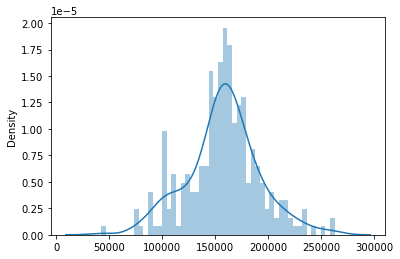

In [69]:
sns.distplot((y_test, predictions), bins=50)

In [71]:
reg.score(X_test, y_test)

0.27946210690162543